In [187]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')
from pymystem3 import Mystem
from collections import Counter
import re


In [4]:
df1 = pd.read_csv('TFТранзакции.csv')
df2 = pd.read_csv('TFЦенообразование.csv')
df3 = pd.read_csv('TFОписание.csv')

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81527 entries, 0 to 81526
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Кличка питомца     81527 non-null  object 
 1   ИД питомца         81527 non-null  int64  
 2   Название приюта    81527 non-null  object 
 3   Название операции  81527 non-null  object 
 4   Сумма операции     81527 non-null  float64
 5   Дата               81527 non-null  object 
 6   Номер заказа       81527 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 4.4+ MB


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13318 entries, 0 to 13317
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Идентификатор пользователя  13318 non-null  int64  
 1   Название приюта             13318 non-null  object 
 2   Дата/время платежа          13318 non-null  object 
 3   Наименование услуги         13318 non-null  object 
 4   Сумма платежа               13318 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 520.4+ KB


In [7]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 1554 non-null   int64 
 1   Кличка             1554 non-null   object
 2   Ссылка на профиль  1554 non-null   object
 3   Приют              1554 non-null   object
 4   Город              1554 non-null   object
 5   Порода             1554 non-null   object
 6   Вид                1554 non-null   object
 7   Дата рождения      1554 non-null   object
 8   Пол                1554 non-null   object
 9   В избранном        1554 non-null   int64 
 10  Уже дома           1554 non-null   int64 
 11  Забрать домой      1554 non-null   int64 
 12  Погулять           1554 non-null   int64 
dtypes: int64(5), object(8)
memory usage: 158.0+ KB


In [9]:
df2.columns = ['uid', 'shelter_name', 'datetime',
       'operation', 'price']

In [12]:
df2.groupby['uid'].agg({''})

array([27542, 26869,  4696, ..., 29164,  6226, 29166])

In [14]:
df2['uid'].nunique()

1660

In [50]:
df1.columns = ['pname', 'pid', 'shelter_name', 'favor',
       'price', 'dt', 'orderid']

In [22]:
df3.columns = ['pid', 'pname', 'profile_url', 'shelter', 'city', 'breed', 'species',
       'birth_date', 'gender', 'favourite', 'at_home', 'seeks_home',
       'walks']

In [19]:
df1

,pname,pid,shelter_name,favor,price,date,orderid
0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",95.0,2016-11-08 18:44:35,5944
1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",45.0,2016-11-08 18:44:35,5945
2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5946
3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5947
4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5948
...,...,...,...,...,...,...,...
81522,Кай,1560,Котланд-Ярд,Шприцы и препараты для инъекций,135.0,2020-04-13 10:39:42,66891
81523,Эрмоса,1564,Лёхин дом,Биохимический анализ крови,100.0,2020-04-13 10:46:21,66892
81524,Ритка,1012,Центральный приют Спб для бездомных кошек!,Дневная порция вкуснейшего корма,61.0,2020-04-13 11:09:26,66895
81525,Рэмбо,1558,Матроскин,КотоДень,108.0,2020-04-13 11:14:17,66896


In [20]:
df1.shelter_name.value_counts()

Самарский приют для животных "НадеждА"        18752
Кошачий приют "ДОМИК"                          8114
Мокрый нос                                     7665
Матроскин                                      7630
Люськин дом                                    6991
Частный Московский приют "МУРКОША"             5426
Кот и Пёс                                      4118
Котофей                                        3017
Центральный приют Спб для бездомных кошек!     2725
Приют для кошек "ЯрКот"                        2292
ФлагманВет                                     2110
Шереметьевский приют                           2041
Убежище                                        1814
Лёхин дом                                      1752
Добрые сердца                                  1721
Приют для кошек "Потеряшка"                    1429
Республика котов                                894
Лаюшки и Мяушки                                 825
Стационар для Животных "Сен Бернар"             824
4 лапы      

In [213]:
df3

,pid,pname,profile_url,shelter,city,breed,species,birth_date,gender,favourite,at_home,seeks_home,walks
0,1,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0,1,0,0
1,2,Фифа,https://teddyfood.com/ru/animals/fifa/,Ковчег,Смоленск,Мейн-кун,Кошки,2000-03-03,девочка,0,1,0,0
2,3,Джинни,https://teddyfood.com/ru/animals/ginny/,"Стационар для Животных ""Сен Бернар""",Самара,Без породы,Кошки,2015-07-01,девочка,0,1,0,0
3,4,Партос,https://teddyfood.com/ru/animals/porthos/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2013-11-01,мальчик,0,1,0,0
4,5,Самуэль,https://teddyfood.com/ru/animals/samuel/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-04-01,мальчик,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1556,Фева,https://teddyfood.com/ru/animals/Feva_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-11-30,девочка,0,1,0,0
1550,1557,Гром,https://teddyfood.com/ru/animals/Grom_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2019-07-19,мальчик,5,0,0,0
1551,1558,Рэмбо,https://teddyfood.com/ru/animals/Rembo_Matroskin/,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1,0,0,0
1552,1559,Банни,https://teddyfood.com/ru/animals/Banni_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-07-15,мальчик,1,0,0,0


In [24]:
df3.city.value_counts()

Самара             398
Пермь              351
Москва             200
Санкт-Петербург    129
Казань             117
Волгоград          113
Сочи                67
Ярославль           51
Екатеринбург        48
Киров               46
Нефтекамск          28
Королёв              5
Смоленск             1
Name: city, dtype: int64

In [220]:
df3['breed'].value_counts()

Без породы                             1483
Британец                                 10
Американский стаффордширский терьер       9
Сиамская                                  6
Тайская                                   4
Эрмитажная                                4
Персидская                                4
Питбуль                                   4
Мейн-кун                                  3
Сфинкс                                    2
Экзот                                     2
Русский голубой                           2
Британская вислоухая кошка                2
Ангорская кошка                           2
Тойгер                                    1
Хайленд-фолд                              1
Корниш-рекс                               1
Хаски                                     1
Девон- рекс                               1
Украинский левкой                         1
Скоттишфолд                               1
Манчкин                                   1
Аргентинский дог                

In [215]:
df3['breed'].value_counts(normalize=True)

Без породы                             0.954311
Британец                               0.006435
Американский стаффордширский терьер    0.005792
Сиамская                               0.003861
Тайская                                0.002574
Эрмитажная                             0.002574
Персидская                             0.002574
Питбуль                                0.002574
Мейн-кун                               0.001931
Сфинкс                                 0.001287
Экзот                                  0.001287
Русский голубой                        0.001287
Британская вислоухая кошка             0.001287
Ангорская кошка                        0.001287
Тойгер                                 0.000644
Хайленд-фолд                           0.000644
Корниш-рекс                            0.000644
Хаски                                  0.000644
Девон- рекс                            0.000644
Украинский левкой                      0.000644
Скоттишфолд                            0

In [27]:
df3.species.value_counts()

Кошки     1399
Собаки     155
Name: species, dtype: int64

In [226]:
df3.species.value_counts(normalize=True)

Кошки     0.900257
Собаки    0.099743
Name: species, dtype: float64

In [227]:
df3.gender.value_counts(normalize=True)

девочка    0.579794
мальчик    0.420206
Name: gender, dtype: float64

In [32]:
df3.describe(include=["O"])

,pname,profile_url,shelter,city,breed,species,birth_date,gender
count,1554,1554,1554,1554,1554,1554,1554,1554
unique,1271,1554,24,13,31,2,867,2
top,Алиса,https://teddyfood.com/ru/animals/Vesnushka/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2016-01-20,девочка
freq,7,1,350,398,1483,1399,22,901


In [33]:
df3

,pid,pname,profile_url,shelter,city,breed,species,birth_date,gender,favourite,at_home,seeks_home,walks
0,1,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0,1,0,0
1,2,Фифа,https://teddyfood.com/ru/animals/fifa/,Ковчег,Смоленск,Мейн-кун,Кошки,2000-03-03,девочка,0,1,0,0
2,3,Джинни,https://teddyfood.com/ru/animals/ginny/,"Стационар для Животных ""Сен Бернар""",Самара,Без породы,Кошки,2015-07-01,девочка,0,1,0,0
3,4,Партос,https://teddyfood.com/ru/animals/porthos/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2013-11-01,мальчик,0,1,0,0
4,5,Самуэль,https://teddyfood.com/ru/animals/samuel/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-04-01,мальчик,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1556,Фева,https://teddyfood.com/ru/animals/Feva_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-11-30,девочка,0,1,0,0
1550,1557,Гром,https://teddyfood.com/ru/animals/Grom_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2019-07-19,мальчик,5,0,0,0
1551,1558,Рэмбо,https://teddyfood.com/ru/animals/Rembo_Matroskin/,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1,0,0,0
1552,1559,Банни,https://teddyfood.com/ru/animals/Banni_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-07-15,мальчик,1,0,0,0


In [37]:
df3['birth_date'] = pd.to_datetime(df3['birth_date'], format='%Y-%m-%d')

,pid,pname,profile_url,shelter,city,breed,species,birth_date,gender,favourite,at_home,seeks_home,walks
0,1,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0,1,0,0
1,2,Фифа,https://teddyfood.com/ru/animals/fifa/,Ковчег,Смоленск,Мейн-кун,Кошки,2000-03-03,девочка,0,1,0,0
2,3,Джинни,https://teddyfood.com/ru/animals/ginny/,"Стационар для Животных ""Сен Бернар""",Самара,Без породы,Кошки,2015-07-01,девочка,0,1,0,0
3,4,Партос,https://teddyfood.com/ru/animals/porthos/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2013-11-01,мальчик,0,1,0,0
4,5,Самуэль,https://teddyfood.com/ru/animals/samuel/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-04-01,мальчик,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1549,1556,Фева,https://teddyfood.com/ru/animals/Feva_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-11-30,девочка,0,1,0,0
1550,1557,Гром,https://teddyfood.com/ru/animals/Grom_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2019-07-19,мальчик,5,0,0,0
1551,1558,Рэмбо,https://teddyfood.com/ru/animals/Rembo_Matroskin/,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1,0,0,0
1552,1559,Банни,https://teddyfood.com/ru/animals/Banni_Matroskin/,Матроскин,Пермь,Без породы,Кошки,2017-07-15,мальчик,1,0,0,0


In [39]:
df3['birth_date'].dtype

dtype('<M8[ns]')

In [40]:
df3.at_home.value_counts()

1    1148
0     406
Name: at_home, dtype: int64

In [41]:
df3.seeks_home.value_counts()

0    1457
1      77
2      12
3       8
Name: seeks_home, dtype: int64

In [42]:
df3.walks.value_counts()

0     1357
1      142
2       31
3       16
4        3
6        2
10       1
7        1
5        1
Name: walks, dtype: int64

In [43]:
df1

,pname,pid,shelter_name,favor,price,date,orderid
0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",95.0,2016-11-08 18:44:35,5944
1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",45.0,2016-11-08 18:44:35,5945
2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5946
3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5947
4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5948
...,...,...,...,...,...,...,...
81522,Кай,1560,Котланд-Ярд,Шприцы и препараты для инъекций,135.0,2020-04-13 10:39:42,66891
81523,Эрмоса,1564,Лёхин дом,Биохимический анализ крови,100.0,2020-04-13 10:46:21,66892
81524,Ритка,1012,Центральный приют Спб для бездомных кошек!,Дневная порция вкуснейшего корма,61.0,2020-04-13 11:09:26,66895
81525,Рэмбо,1558,Матроскин,КотоДень,108.0,2020-04-13 11:14:17,66896


In [44]:
df1['date'] = pd.to_datetime(df1['date'], format='%Y-%m-%d %H:%M:%S')
df1['date'].dtype

dtype('<M8[ns]')

In [47]:
df1.describe(include=['O'])

,pname,shelter_name,favor
count,81527,81527,81527
unique,1260,24,603
top,Зося,"Самарский приют для животных ""НадеждА""",1 КотоДень
freq,786,18752,15476


In [49]:
print('min date:', df1.date.min())
print('max date:', df1.date.max())

min date: 2016-11-08 18:44:35
max date: 2020-04-13 11:14:17


In [51]:
df1['date'] = pd.DatetimeIndex(df1['dt']).date

In [52]:
df1

,pname,pid,shelter_name,favor,price,dt,orderid,date
0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",95.0,2016-11-08 18:44:35,5944,2016-11-08
1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",45.0,2016-11-08 18:44:35,5945,2016-11-08
2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5946,2016-11-08
3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5947,2016-11-08
4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5948,2016-11-08
...,...,...,...,...,...,...,...,...
81522,Кай,1560,Котланд-Ярд,Шприцы и препараты для инъекций,135.0,2020-04-13 10:39:42,66891,2020-04-13
81523,Эрмоса,1564,Лёхин дом,Биохимический анализ крови,100.0,2020-04-13 10:46:21,66892,2020-04-13
81524,Ритка,1012,Центральный приют Спб для бездомных кошек!,Дневная порция вкуснейшего корма,61.0,2020-04-13 11:09:26,66895,2020-04-13
81525,Рэмбо,1558,Матроскин,КотоДень,108.0,2020-04-13 11:14:17,66896,2020-04-13


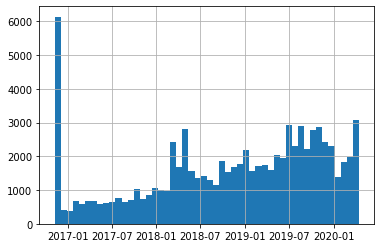

In [58]:
df1.date.hist(bins=50)

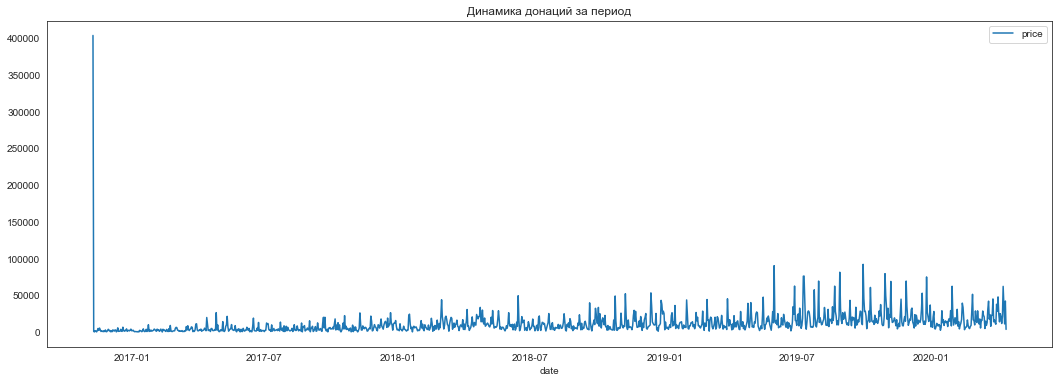

In [233]:
df1.groupby('date').agg({'price':'sum'}).plot(figsize=(18,6), title='Динамика донаций за период')

In [74]:
plt.plot(df1.groupby('date').agg({'price':'sum'}))
plt.figure()
plt.title('Выручка по дням:')
plt.gcf().autofmt_xdate()

SyntaxError: positional argument follows keyword argument (<ipython-input-74-8dc264fdb0cc>, line 1)

In [66]:
df = df1.merge(df3, on='pid', how='left')
df

,pname_x,pid,shelter_name,favor,price,dt,orderid,date,pname_y,profile_url,shelter,city,breed,species,birth_date,gender,favourite,at_home,seeks_home,walks
0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",95.0,2016-11-08 18:44:35,5944,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",45.0,2016-11-08 18:44:35,5945,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5946,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5947,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5948,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81522,Кай,1560,Котланд-Ярд,Шприцы и препараты для инъекций,135.0,2020-04-13 10:39:42,66891,2020-04-13,Кай,https://teddyfood.com/ru/animals/Kai_Kotland/,Котланд-Ярд,Санкт-Петербург,Без породы,Кошки,2019-03-21,мальчик,0.0,0.0,0.0,0.0
81523,Эрмоса,1564,Лёхин дом,Биохимический анализ крови,100.0,2020-04-13 10:46:21,66892,2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
81524,Ритка,1012,Центральный приют Спб для бездомных кошек!,Дневная порция вкуснейшего корма,61.0,2020-04-13 11:09:26,66895,2020-04-13,Ритка,https://teddyfood.com/ru/animals/Ritka/,Центральный приют Спб для бездомных кошек!,Санкт-Петербург,Без породы,Кошки,2015-04-07,девочка,8.0,0.0,0.0,0.0
81525,Рэмбо,1558,Матроскин,КотоДень,108.0,2020-04-13 11:14:17,66896,2020-04-13,Рэмбо,https://teddyfood.com/ru/animals/Rembo_Matroskin/,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1.0,0.0,0.0,0.0


In [76]:
df.favor.value_counts().head(50)

1 КотоДень                                15476
КотоДень                                   9159
1 ПёсоДень                                 5070
Наполнитель для туалета                    3352
Порция вкуснейшего корма                   3217
Наполнитель для туалета (1 порция)         3103
Дневная порция вкуснейшего корма           2857
Стерилизация                               2714
ПёсоДень                                   2234
Порция корма                               2200
Корм с курицей и рисом                     2168
Рекламировать питомца (пакет Mini)         2081
Корм с курицей и рисом (1 порция)          1388
1 КотоНеделя                               1211
КотоНеделя                                 1172
Рекламировать питомца (пакет Standart)     1102
Избавить питомца от блох                   1040
Кастрация питомца                           991
Избавить питомца от глистов                 886
Защитить питомца от вирусов                 702
 Новогодний КотоНабор                   

In [79]:
df.favor.nunique()

603

In [78]:
m = Mystem()
favor_list = df['favor'].unique() #получим уникальные значения 
favor_string = ' '.join(favor_list) #объединим значения целей в единую строку
lemmas = m.lemmatize(favor_string) #применим лемматизацию
print(Counter(lemmas)) #выведем количество часто встречающихся слов #lemmas    


Counter({' ': 1957, 'от': 127, 'для': 95, 'избавлять': 68, 'корм': 67, 'лечение': 64, 'и': 61, 'питомец': 55, 'препарат': 53, 'анализ': 39, 'вирус': 38, 'защищать': 34, 'при': 33, ') ': 32, 'блоха': 31, 'глист': 28, 'на': 27, ' "': 23, ' (': 22, 'кровь': 22, 'клещ': 19, 'стерилизация': 18, 'оплачивать': 18, '  ': 18, 'узи': 16, 'операция': 16, 'с': 15, ', ': 15, '" ': 13, 'инфекция': 13, 'в': 13, 'игрушка': 12, 'прием': 12, 'кошка': 11, '1': 11, '-': 11, 'порция': 10, 'Royal': 10, 'Canin': 10, '" (': 10, 'удаление': 10, 'терапия': 10, 'танцующий': 9, 'дразнилка': 9, 'расстройство': 9, 'болезнь': 9, 'врач': 9, 'восстановление': 9, 'вакцина': 8, 'капля': 8, 'по': 8, 'тест': 8, 'почка': 8, 'зуб': 7, 'кастрация': 7, 'иммунитет': 7, 'шампунь': 7, '. ': 7, 'глаз': 7, 'food': 7, 'паразит': 7, 'биохимический': 7, 'лишать': 7, 'заболевание': 7, 'лекарство': 7, 'котенок': 6, 'общий': 6, 'осмотр': 6, 'айва': 6, 'лечебный': 6, 'глазик': 6, 'желудок': 6, 'печень': 6, 'мочекаменный': 6, 'проблема': 

In [85]:
dfg = df.groupby('pid').agg({'price':'sum', 'orderid':'count', 'favor':'count', 'walks':'sum','species':'max', 'city':'max', 'favourite':'sum', 'gender':'max'})
dfg.columns

Index(['price', 'orderid', 'favor', 'walks', 'species', 'city', 'favourite',
       'gender'],
      dtype='object')

In [86]:
dfg.columns=['revenue', 'n_orders', 'n_favors', 'n_walks', 'species', 'city', 'added_as_favorite', 'gender']
dfg

,revenue,n_orders,n_favors,n_walks,species,city,added_as_favorite,gender
pid,,,,,,,,
1,2760.0,7,7,0.0,Кошки,Самара,0.0,девочка
2,1786.0,14,14,0.0,Кошки,Смоленск,0.0,девочка
3,15208.0,212,212,0.0,Кошки,Самара,0.0,девочка
4,4555.0,64,64,0.0,Кошки,Самара,0.0,мальчик
5,7833.0,124,124,0.0,Кошки,Самара,124.0,мальчик
...,...,...,...,...,...,...,...,...
1561,700.0,4,4,0.0,NaN,NaN,0.0,NaN
1562,732.0,3,3,0.0,NaN,NaN,0.0,NaN
1563,732.0,5,5,0.0,NaN,NaN,0.0,NaN


In [118]:
dfg.to_csv('df_grouped.csv')

In [225]:
dfg.corr().round(2)

,revenue,n_orders,n_favors,n_walks,added_as_favorite
revenue,1.00,0.91,0.91,0.57,0.77
n_orders,0.91,1.00,1.00,0.52,0.79
n_favors,0.91,1.00,1.00,0.52,0.79
n_walks,0.57,0.52,0.52,1.00,0.54
added_as_favorite,0.77,0.79,0.79,0.54,1.00


In [236]:
import seaborn as sns

Var_Corr = dfg.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, cmap= 'coolwarm', )


SyntaxError: positional argument follows keyword argument (<ipython-input-236-c6b88f2f47f0>, line 5)

In [88]:
dfg.describe()

,revenue,n_orders,n_favors,n_walks,added_as_favorite
count,1538.000000,1538.000000,1538.000000,1538.000000,1538.000000
mean,9313.010949,53.008453,53.008453,20.327698,956.682705
std,13034.683013,70.191340,70.191340,92.910710,3916.664398
min,20.000000,1.000000,1.000000,0.000000,0.000000
25%,2511.250000,15.000000,15.000000,0.000000,20.000000
50%,5144.000000,30.000000,30.000000,0.000000,100.000000
75%,10398.640000,61.000000,61.000000,0.000000,479.000000
max,156809.700000,768.000000,768.000000,1437.000000,83712.000000


In [90]:
dfg.describe(include=["O"])

,species,city,gender
count,1533,1533,1533
unique,2,13,2
top,Кошки,Самара,девочка
freq,1379,396,888


In [91]:
dfg.groupby('gender').agg({"revenue":'sum'})

,revenue
gender,
девочка,8425379.10
мальчик,5892533.74


In [92]:
dfg.groupby('gender').agg({"revenue":'mean'})

,revenue
gender,
девочка,9488.039527
мальчик,9135.711225


In [121]:
df

,pname_x,pid,shelter_name,favor,price,dt,orderid,date,pname_y,profile_url,shelter,city,breed,species,birth_date,gender,favourite,at_home,seeks_home,walks
0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",95.0,2016-11-08 18:44:35,5944,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",45.0,2016-11-08 18:44:35,5945,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5946,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5947,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,30.0,2016-11-08 18:44:35,5948,2016-11-08,Мадлен,https://teddyfood.com/ru/animals/madeleine/,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81522,Кай,1560,Котланд-Ярд,Шприцы и препараты для инъекций,135.0,2020-04-13 10:39:42,66891,2020-04-13,Кай,https://teddyfood.com/ru/animals/Kai_Kotland/,Котланд-Ярд,Санкт-Петербург,Без породы,Кошки,2019-03-21,мальчик,0.0,0.0,0.0,0.0
81523,Эрмоса,1564,Лёхин дом,Биохимический анализ крови,100.0,2020-04-13 10:46:21,66892,2020-04-13,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
81524,Ритка,1012,Центральный приют Спб для бездомных кошек!,Дневная порция вкуснейшего корма,61.0,2020-04-13 11:09:26,66895,2020-04-13,Ритка,https://teddyfood.com/ru/animals/Ritka/,Центральный приют Спб для бездомных кошек!,Санкт-Петербург,Без породы,Кошки,2015-04-07,девочка,8.0,0.0,0.0,0.0
81525,Рэмбо,1558,Матроскин,КотоДень,108.0,2020-04-13 11:14:17,66896,2020-04-13,Рэмбо,https://teddyfood.com/ru/animals/Rembo_Matroskin/,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1.0,0.0,0.0,0.0


In [169]:
a = dfg.sort_values(by='revenue', ascending=False)
a = a.reset_index()
a

,pid,revenue,n_orders,n_favors,n_walks,species,city,added_as_favorite,gender
0,431,156809.70,768,768,768.0,Кошки,Казань,83712.0,девочка
1,557,111488.00,316,316,316.0,Собаки,Казань,19592.0,мальчик
2,93,103916.28,479,479,479.0,Собаки,Киров,34488.0,мальчик
3,1034,84483.00,297,297,297.0,Кошки,Санкт-Петербург,11880.0,девочка
4,94,83126.36,479,479,1437.0,Собаки,Киров,30177.0,мальчик
...,...,...,...,...,...,...,...,...,...
1533,448,49.00,2,2,0.0,Кошки,Пермь,0.0,девочка
1534,1522,43.00,1,1,0.0,Кошки,Пермь,0.0,мальчик
1535,1556,39.00,1,1,0.0,Кошки,Пермь,0.0,девочка
1536,287,30.00,1,1,0.0,Кошки,Самара,0.0,девочка


In [122]:
df.to_csv('df_merged.csv')

In [167]:
a['pid'] = a['pid'].to_string()

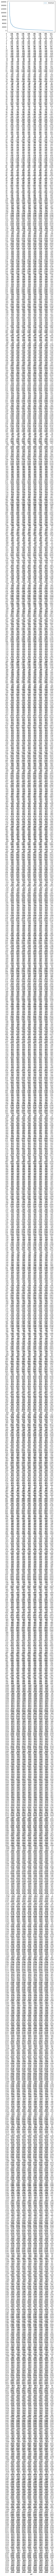

In [117]:
a.plot(y='revenue', x='pid',)

In [108]:
df.pname_x.nunique()

1260

In [163]:
np.percentile(a['revenue'], 99)

70791.94009999967

In [168]:
a

,pid,revenue,n_orders,n_favors,n_walks,species,city,added_as_favorite,gender
0,0 431\n1 557\n2 93\n3 ...,156809.70,768,768,768.0,Кошки,Казань,83712.0,девочка
1,0 431\n1 557\n2 93\n3 ...,111488.00,316,316,316.0,Собаки,Казань,19592.0,мальчик
2,0 431\n1 557\n2 93\n3 ...,103916.28,479,479,479.0,Собаки,Киров,34488.0,мальчик
3,0 431\n1 557\n2 93\n3 ...,84483.00,297,297,297.0,Кошки,Санкт-Петербург,11880.0,девочка
4,0 431\n1 557\n2 93\n3 ...,83126.36,479,479,1437.0,Собаки,Киров,30177.0,мальчик
...,...,...,...,...,...,...,...,...,...
1533,0 431\n1 557\n2 93\n3 ...,49.00,2,2,0.0,Кошки,Пермь,0.0,девочка
1534,0 431\n1 557\n2 93\n3 ...,43.00,1,1,0.0,Кошки,Пермь,0.0,мальчик
1535,0 431\n1 557\n2 93\n3 ...,39.00,1,1,0.0,Кошки,Пермь,0.0,девочка
1536,0 431\n1 557\n2 93\n3 ...,30.00,1,1,0.0,Кошки,Самара,0.0,девочка


In [171]:
acl = a[a['revenue']<= np.percentile(a['revenue'], 99)]

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81527 entries, 0 to 81526
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   pname_x       81527 non-null  object        
 1   pid           81527 non-null  int64         
 2   shelter_name  81527 non-null  object        
 3   favor         81527 non-null  object        
 4   price         81527 non-null  float64       
 5   dt            81527 non-null  datetime64[ns]
 6   orderid       81527 non-null  int64         
 7   date          81527 non-null  object        
 8   pname_y       81508 non-null  object        
 9   profile_url   81508 non-null  object        
 10  shelter       81508 non-null  object        
 11  city          81508 non-null  object        
 12  breed         81508 non-null  object        
 13  species       81508 non-null  object        
 14  birth_date    81508 non-null  datetime64[ns]
 15  gender        81508 non-null  object

/Users/ande/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


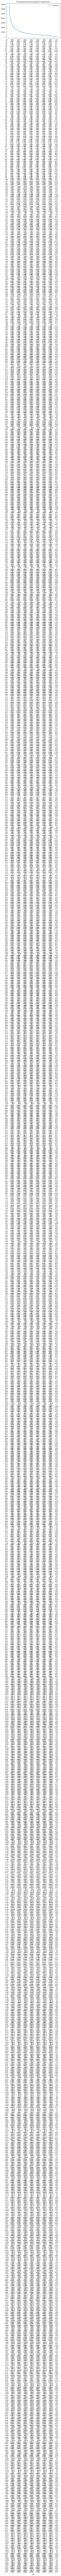

In [232]:
acl['pid'] = acl['pid'].to_string()
acl.plot(y='revenue', x='pid',title='Распределение донаций на животных:')

In [125]:
dfg.added_as_favorite.value_counts()

0.0       191
18.0       19
20.0       17
24.0       16
48.0       15
         ... 
3248.0      1
324.0       1
174.0       1
81.0        1
5126.0      1
Name: added_as_favorite, Length: 568, dtype: int64

In [127]:
dfg.n_walks.value_counts()

0.0      1341
32.0        5
15.0        4
27.0        4
43.0        4
         ... 
115.0       1
322.0       1
83.0        1
91.0        1
216.0       1
Name: n_walks, Length: 142, dtype: int64

In [128]:
dfg

,revenue,n_orders,n_favors,n_walks,species,city,added_as_favorite,gender
pid,,,,,,,,
1,2760.0,7,7,0.0,Кошки,Самара,0.0,девочка
2,1786.0,14,14,0.0,Кошки,Смоленск,0.0,девочка
3,15208.0,212,212,0.0,Кошки,Самара,0.0,девочка
4,4555.0,64,64,0.0,Кошки,Самара,0.0,мальчик
5,7833.0,124,124,0.0,Кошки,Самара,124.0,мальчик
...,...,...,...,...,...,...,...,...
1561,700.0,4,4,0.0,NaN,NaN,0.0,NaN
1562,732.0,3,3,0.0,NaN,NaN,0.0,NaN
1563,732.0,5,5,0.0,NaN,NaN,0.0,NaN


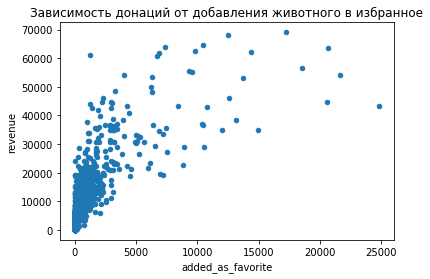

In [173]:
acl.plot(x='added_as_favorite', y='revenue', kind='scatter', title='Зависимость донаций от добавления животного в избранное')

In [174]:
acl['added_as_favorite'].corr(acl['revenue'])

0.7529897525530929

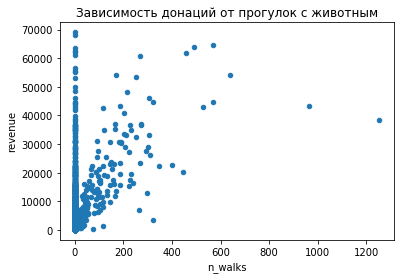

In [223]:
acl.plot(x='n_walks', y='revenue', kind='scatter', title='Зависимость донаций от прогулок с животным')

In [224]:
acl['n_walks'].corr(acl['revenue'])

0.44818245132051954

In [201]:
acl['added_as_favorite']>0

16       True
17       True
18       True
19       True
20       True
        ...  
1533    False
1534    False
1535    False
1536    False
1537    False
Name: added_as_favorite, Length: 1522, dtype: bool

In [202]:
acl['fv'] = acl['added_as_favorite']>0
acl['fv'].value_counts().normalize(True)

/Users/ande/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


True     1331
False     191
Name: fv, dtype: int64

In [205]:
acl['fv'].value_counts(normalize=True)

True     0.874507
False    0.125493
Name: fv, dtype: float64

In [203]:
acl['wks'] = acl['n_walks']>0
acl['wks'].value_counts()

/Users/ande/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


False    1336
True      186
Name: wks, dtype: int64

In [206]:
acl['wks'].value_counts(normalize=True)

False    0.877792
True     0.122208
Name: wks, dtype: float64

In [131]:
dfu = pd.read_excel('categories.xlsx')
dfu

/Users/ande/opt/anaconda3/lib/python3.7/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


,Unnamed: 0,pname_x,pid,shelter_name,favor,category,price,dt,orderid,date,...,shelter,city,breed,species,birth_date,gender,favourite,at_home,seeks_home,walks
0,0,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошек ""Танцующая дразнилка""",Игры,95,2016-11-08 18:44:35,5944,2016-11-08,...,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
1,1,Мадлен,1,"Самарский приют для животных ""НадеждА""","Игрушка для кошки ""Зооник Шуршик""",Игры,45,2016-11-08 18:44:35,5945,2016-11-08,...,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
2,2,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,Питание,30,2016-11-08 18:44:35,5946,2016-11-08,...,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
3,3,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,Питание,30,2016-11-08 18:44:35,5947,2016-11-08,...,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
4,4,Мадлен,1,"Самарский приют для животных ""НадеждА""",Корм Gemon с курицей и рисом 1 порция,Питание,30,2016-11-08 18:44:35,5948,2016-11-08,...,"Самарский приют для животных ""НадеждА""",Самара,Без породы,Кошки,2015-09-23,девочка,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81522,81522,Кай,1560,Котланд-Ярд,Шприцы и препараты для инъекций,Лечение,135,2020-04-13 10:39:42,66891,2020-04-13,...,Котланд-Ярд,Санкт-Петербург,Без породы,Кошки,2019-03-21,мальчик,0.0,0.0,0.0,0.0
81523,81523,Эрмоса,1564,Лёхин дом,Биохимический анализ крови,Лечение,100,2020-04-13 10:46:21,66892,2020-04-13,...,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN
81524,81524,Ритка,1012,Центральный приют Спб для бездомных кошек!,Дневная порция вкуснейшего корма,Питание,61,2020-04-13 11:09:26,66895,2020-04-13,...,Центральный приют Спб для бездомных кошек!,Санкт-Петербург,Без породы,Кошки,2015-04-07,девочка,8.0,0.0,0.0,0.0
81525,81525,Рэмбо,1558,Матроскин,КотоДень,Дни,108,2020-04-13 11:14:17,66896,2020-04-13,...,Матроскин,Пермь,Сиамская,Кошки,2012-03-01,мальчик,1.0,0.0,0.0,0.0


In [132]:
dfu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81527 entries, 0 to 81526
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Unnamed: 0    81527 non-null  int64         
 1   pname_x       81527 non-null  object        
 2   pid           81527 non-null  int64         
 3   shelter_name  81527 non-null  object        
 4   favor         81527 non-null  object        
 5   category      81527 non-null  object        
 6   price         81527 non-null  object        
 7   dt            81527 non-null  datetime64[ns]
 8   orderid       81527 non-null  int64         
 9   date          81527 non-null  datetime64[ns]
 10  pname_y       81508 non-null  object        
 11  profile_url   81508 non-null  object        
 12  shelter       81508 non-null  object        
 13  city          81508 non-null  object        
 14  breed         81508 non-null  object        
 15  species       81508 non-null  object

In [135]:
dfu['price'] = pd.to_numeric(dfu['price'], errors='coerce')
dfu['price'].dtype

dtype('float64')

In [136]:
dfug = dfu.groupby('pid').agg({'category':'unique', 'price': 'sum', 'orderid':'count', 'city':'max', 'favourite':'sum',
                       'walks':'sum', 'seeks_home':'sum'})
dfug

,category,price,orderid,city,favourite,walks,seeks_home
pid,,,,,,,
1,"[Игры, Питание, Лечение]",2760.0,7,Самара,0.0,0.0,0.0
2,"[Бытовые нужды, Лечение, Питание]",1786.0,14,Смоленск,0.0,0.0,0.0
3,"[Лечение, Питание, Бытовые нужды, Игры]",15208.0,212,Самара,0.0,0.0,0.0
4,"[Лечение, Игры, Питание, Бытовые нужды]",4555.0,64,Самара,0.0,0.0,0.0
5,"[Лечение, Игры, Питание, Бытовые нужды]",7833.0,124,Самара,124.0,0.0,0.0
...,...,...,...,...,...,...,...
1561,[Лечение],700.0,4,NaN,0.0,0.0,0.0
1562,[Лечение],732.0,3,NaN,0.0,0.0,0.0
1563,[Лечение],732.0,5,NaN,0.0,0.0,0.0


In [137]:
dfug.head(15)

,category,price,orderid,city,favourite,walks,seeks_home
pid,,,,,,,
1,"[Игры, Питание, Лечение]",2760.0,7,Самара,0.0,0.0,0.0
2,"[Бытовые нужды, Лечение, Питание]",1786.0,14,Смоленск,0.0,0.0,0.0
3,"[Лечение, Питание, Бытовые нужды, Игры]",15208.0,212,Самара,0.0,0.0,0.0
4,"[Лечение, Игры, Питание, Бытовые нужды]",4555.0,64,Самара,0.0,0.0,0.0
5,"[Лечение, Игры, Питание, Бытовые нужды]",7833.0,124,Самара,124.0,0.0,0.0
7,"[Лечение, Питание, Игры, Бытовые нужды]",18814.0,287,Пермь,0.0,0.0,0.0
8,"[Лечение, Питание, Бытовые нужды, Игры]",6250.0,152,Пермь,0.0,0.0,0.0
9,"[Питание, Лечение, Бытовые нужды, Игры]",11769.0,166,Москва,0.0,0.0,0.0
10,"[Питание, Лечение, Бытовые нужды, Игры]",13387.0,176,Самара,0.0,0.0,0.0


In [155]:
dfug['category'][16]

array(['Питание', 'Бытовые нужды', 'Игры'], dtype=object)

In [139]:
def category(string1, string2):
    if string1 in string2:
        return string1

In [147]:
def medical(string):
    if 'Лечение' in string:
        return 'Лечение'

In [151]:
def category2(string1, string2):
    if any (string1 in string2 for string1 in string2):
        return string1

In [158]:
print(category('Лечение', dfug['category'][15]))

Лечение


In [156]:
print(category2('Лечение', dfug['category'][16]))

Лечение


In [145]:
dfug['category'][1]

array(['Игры', 'Питание', 'Лечение'], dtype=object)

In [177]:
#dfug['med_service'] = category('Лечение', dfug['category'])
dfug['med2'] = dfug['category'].str.contains('Лечение', regex=False)

In [179]:
dfug['med2'].value_counts()

True     987
False    551
Name: med2, dtype: int64

In [181]:
dfu['category'].value_counts()

Дни              37276
Питание          15882
Лечение          15499
Бытовые нужды     8553
Реклама           3888
Другое             253
Игры               176
Name: category, dtype: int64

In [235]:
dfu['category'].value_counts(normalize=True).round(2)*100

Дни              46.0
Питание          19.0
Лечение          19.0
Бытовые нужды    10.0
Реклама           5.0
Другое            0.0
Игры              0.0
Name: category, dtype: float64

In [182]:
dfug['promoted'] = dfug['category'].str.contains('Реклама', regex=False)

In [183]:
dfug['promoted'].value_counts()

True     920
False    618
Name: promoted, dtype: int64

In [185]:
dfug

,category,price,orderid,city,favourite,walks,seeks_home,med_service,med2,promoted
pid,,,,,,,,,,
1,"[Игры, Питание, Лечение]",2760.0,7,Самара,0.0,0.0,0.0,None,True,False
2,"[Бытовые нужды, Лечение, Питание]",1786.0,14,Смоленск,0.0,0.0,0.0,None,True,False
3,"[Лечение, Питание, Бытовые нужды, Игры]",15208.0,212,Самара,0.0,0.0,0.0,None,True,False
4,"[Лечение, Игры, Питание, Бытовые нужды]",4555.0,64,Самара,0.0,0.0,0.0,None,True,False
5,"[Лечение, Игры, Питание, Бытовые нужды]",7833.0,124,Самара,124.0,0.0,0.0,None,True,False
...,...,...,...,...,...,...,...,...,...,...
1561,[Лечение],700.0,4,NaN,0.0,0.0,0.0,None,True,False
1562,[Лечение],732.0,3,NaN,0.0,0.0,0.0,None,True,False
1563,[Лечение],732.0,5,NaN,0.0,0.0,0.0,None,True,False


In [194]:
dfug.columns = ['category', 'donated_sum', 'orderid', 'city', 'favourite', 'walks',
       'seeks_home', 'med_service', 'med2', 'promoted']

In [195]:
dfug.groupby('promoted').agg('mean').round(1)

,donated_sum,orderid,favourite,walks,seeks_home,med2
promoted,,,,,,
False,4048.5,26.8,79.9,2.0,1.3,0.7
True,12848.3,70.6,1545.7,32.6,12.2,0.6


In [188]:
promoted = dfug.query('promoted == True')['price']
not_promoted = dfug.query('promoted == False')['price']

alpha = .05 #критический уровень значимости
            #если p-value окажется меньше него - отвергнем нулевую гипотезу

results2 = st.ttest_ind(
    promoted, 
    not_promoted)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, значит между выручкой групп нет статзначимой разницы") 

p-значение: 1.1360145686475561e-40
Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница


In [191]:
dfug.groupby('med2').agg('mean').round(1)

,price,orderid,favourite,walks,seeks_home,promoted
med2,,,,,,
False,6442.9,38.5,548.2,18.9,6.6,0.6
True,10914.3,61.1,1184.7,21.2,8.4,0.6


In [197]:
medicated = dfug.query('med2 == True')['donated_sum']
not_medicated = dfug.query('med2 == False')['donated_sum']

alpha = .05 #критический уровень значимости
            #если p-value окажется меньше него - отвергнем нулевую гипотезу

results2 = st.ttest_ind(
    medicated, 
    not_medicated)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, значит между выручкой групп нет статзначимой разницы") 

p-значение: 8.46341802741875e-11
Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница


In [218]:
acl

,pid,revenue,n_orders,n_favors,n_walks,species,city,added_as_favorite,gender,fv,wks
16,90,69022.73,391,391,0.0,Собаки,Киров,17204.0,мальчик,True,False
17,500,68062.47,379,379,0.0,Кошки,Казань,12507.0,девочка,True,False
18,311,64628.27,284,284,568.0,Собаки,Киров,10508.0,девочка,True,True
19,377,63966.58,246,246,492.0,Собаки,Киров,7380.0,девочка,True,True
20,291,63533.96,413,413,0.0,Кошки,Самара,20650.0,девочка,True,False
...,...,...,...,...,...,...,...,...,...,...,...
1533,448,49.00,2,2,0.0,Кошки,Пермь,0.0,девочка,False,False
1534,1522,43.00,1,1,0.0,Кошки,Пермь,0.0,мальчик,False,False
1535,1556,39.00,1,1,0.0,Кошки,Пермь,0.0,девочка,False,False
1536,287,30.00,1,1,0.0,Кошки,Самара,0.0,девочка,False,False


In [217]:
acl.groupby('fv').agg('mean').round(1)

,pid,revenue,n_orders,n_favors,n_walks,added_as_favorite,wks
fv,,,,,,,
False,565.2,3123.3,32.7,32.7,0.6,0.0,0.0
True,814.1,9264.2,51.6,51.6,17.9,782.5,0.1


In [221]:
fv = acl.query('fv == True')['revenue']
not_fv = acl.query('fv == False')['revenue']

alpha = .05 #критический уровень значимости
            #если p-value окажется меньше него - отвергнем нулевую гипотезу

results2 = st.ttest_ind(
    fv, 
    not_fv)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, значит между выручкой групп нет статзначимой разницы") 

p-значение: 2.5345750351731762e-15
Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница


In [219]:
acl.groupby('wks').agg('mean').round(1)

,pid,revenue,n_orders,n_favors,n_walks,added_as_favorite,fv
wks,,,,,,,
False,792.8,7428.3,44.3,44.3,0.0,501.6,0.9
True,711.5,16145.4,84.6,84.6,128.9,1997.0,1.0


In [222]:
walked = acl.query('wks == True')['revenue']
not_walked = acl.query('wks == False')['revenue']

alpha = .05 #критический уровень значимости
            #если p-value окажется меньше него - отвергнем нулевую гипотезу

results2 = st.ttest_ind(
    walked, 
    not_walked)

print('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, значит между выручкой групп нет статзначимой разницы") 

p-значение: 3.289138835469387e-29
Отвергаем нулевую гипотезу, значит между выручкой групп есть статзначимая разница
